# Travel Recommender using Language Models

This project demonstrates the creation of a travel recommendation system using pre-trained language models like GPT-2. The model is fine-tuned on custom travel data from Kaggle to generate relevant travel recommendations.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys

## Data Loading and Preprocessing

The dataset contains information about various travel destinations, including the type of destination, popularity, and user ratings.


In [ ]:
destinations = pd.read_csv('/content/drive/MyDrive/LLM Travel Recommender/Expanded_Destinations.csv')
user_reviews = pd.read_csv('/content/drive/MyDrive/LLM Travel Recommender/Final_Updated_Expanded_Reviews.csv')
user_history = pd.read_csv('/content/drive/MyDrive/LLM Travel Recommender/Final_Updated_Expanded_UserHistory.csv')
users = pd.read_csv('/content/drive/MyDrive/LLM Travel Recommender/Final_Updated_Expanded_Users.csv')

In [ ]:
destinations.isnull().sum()

,0
DestinationID,0
Name,0
State,0
Type,0
Popularity,0
BestTimeToVisit,0


In [ ]:
user_reviews.isnull().sum()

,0
ReviewID,0
DestinationID,0
UserID,0
Rating,0
ReviewText,0


In [ ]:
user_history.isnull().sum()

,0
HistoryID,0
UserID,0
DestinationID,0
VisitDate,0
ExperienceRating,0


In [ ]:
users.isnull().sum()

,0
UserID,0
Name,0
Email,0
Preferences,0
Gender,0
NumberOfAdults,0
NumberOfChildren,0


In [ ]:
destinations.head()

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [ ]:
user_reviews.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,178,327,2,Incredible monument!
1,2,411,783,1,Loved the beaches!
2,3,927,12,2,A historical wonder
3,4,358,959,3,Incredible monument!
4,5,989,353,2,Loved the beaches!


In [ ]:
mergeDestReviews = pd.merge(destinations, user_reviews, on='DestinationID',how = 'inner')

In [ ]:
mergeDestReviews.head()

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit,ReviewID,UserID,Rating,ReviewText
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb,666,479,1,A historical wonder
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar,90,558,2,A historical wonder
2,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar,130,528,3,Incredible monument!
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar,869,126,5,Loved the beaches!
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun,402,947,1,A historical wonder


In [ ]:
user_history.head()

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
0,1,525,760,2024-01-01,3
1,2,184,532,2024-02-15,5
2,3,897,786,2024-03-20,2
3,4,470,660,2024-01-01,1
4,5,989,389,2024-02-15,4


In [ ]:
users.head()

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0
1,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2
2,3,Kavya,kavya@example.com,"City, Historical",Female,2,0
3,4,Anika,anika@example.com,"Beaches, Historical",Female,1,0
4,5,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2


In [ ]:
usersanduserhist = pd.merge(users, user_history, on='UserID',how = 'inner')

In [ ]:
usersanduserhist.head()

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren,HistoryID,DestinationID,VisitDate,ExperienceRating
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0,599,941,2024-02-15,5
1,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0,876,467,2024-03-20,3
2,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2,31,385,2024-01-01,5
3,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2,451,437,2024-01-01,2
4,3,Kavya,kavya@example.com,"City, Historical",Female,2,0,481,904,2024-01-01,4


In [ ]:
finalDf = pd.merge(mergeDestReviews, usersanduserhist, on='DestinationID',how = 'inner')

In [ ]:
finalDf.isnull().sum()

,0
DestinationID,0
Name_x,0
State,0
Type,0
Popularity,0
BestTimeToVisit,0
ReviewID,0
UserID_x,0
Rating,0
ReviewText,0


In [ ]:
finalDf.columns

Index(['DestinationID', 'Name_x', 'State', 'Type', 'Popularity',
       'BestTimeToVisit', 'ReviewID', 'UserID_x', 'Rating', 'ReviewText',
       'UserID_y', 'Name_y', 'Email', 'Preferences', 'Gender',
       'NumberOfAdults', 'NumberOfChildren', 'HistoryID', 'VisitDate',
       'ExperienceRating'],
      dtype='object')

In [ ]:
finalDf = finalDf.drop(['Name_x','UserID_x'],axis=1)
finalDf = finalDf.rename(columns={'Name_y': 'Name', 'UserID_y': 'UserID'})

In [ ]:
finalDf.dtypes

,0
DestinationID,int64
State,object
Type,object
Popularity,float64
BestTimeToVisit,object
ReviewID,int64
Rating,int64
ReviewText,object
UserID,int64
Name,object


In [ ]:
finalDf['VisitDate'] = pd.to_datetime(finalDf['VisitDate'])
finalDf.dtypes

,0
DestinationID,int64
State,object
Type,object
Popularity,float64
BestTimeToVisit,object
ReviewID,int64
Rating,int64
ReviewText,object
UserID,int64
Name,object


In [ ]:
finalDf.head(10)

,DestinationID,State,Type,Popularity,BestTimeToVisit,ReviewID,Rating,ReviewText,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren,HistoryID,VisitDate,ExperienceRating
0,2,Goa,Beach,8.605032,Nov-Mar,90,2,A historical wonder,348,Anika,anika@example.com,"City, Historical",Female,1,0,653,2024-02-15,4
1,2,Goa,Beach,8.605032,Nov-Mar,130,3,Incredible monument!,348,Anika,anika@example.com,"City, Historical",Female,1,0,653,2024-02-15,4
2,4,Kerala,Nature,7.977386,Sep-Mar,869,5,Loved the beaches!,490,Isha,isha@example.com,"Beaches, Historical",Female,2,1,548,2024-02-15,1
3,4,Kerala,Nature,7.977386,Sep-Mar,869,5,Loved the beaches!,518,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2,878,2024-02-15,3
4,5,Jammu and Kashmir,Adventure,8.399822,Apr-Jun,402,1,A historical wonder,599,Kavya,kavya@example.com,"Nature, Adventure",Female,1,0,886,2024-01-01,5
5,8,Rajasthan,City,9.458705,Oct-Mar,374,3,Loved the beaches!,876,Ritvik,ritvik@example.com,"City, Historical",Male,2,2,322,2024-01-01,5
6,8,Rajasthan,City,9.458705,Oct-Mar,374,3,Loved the beaches!,888,Riya,riya@example.com,"City, Historical",Female,2,0,669,2024-03-20,3
7,9,Kerala,Nature,9.260450,Sep-Mar,129,3,A historical wonder,272,Arjun,arjun@example.com,"Nature, Adventure",Male,2,0,629,2024-02-15,2
8,9,Kerala,Nature,9.260450,Sep-Mar,129,3,A historical wonder,899,Anika,anika@example.com,"Nature, Adventure",Female,1,1,109,2024-01-01,1
9,9,Kerala,Nature,9.260450,Sep-Mar,829,4,Incredible monument!,272,Arjun,arjun@example.com,"Nature, Adventure",Male,2,0,629,2024-02-15,2


In [ ]:
finalDf.head()
finalDf['Gender'] = finalDf['Gender'].replace({'Male':'M','Female':'F'})
finalDf.head(20)

,DestinationID,State,Type,Popularity,BestTimeToVisit,ReviewID,Rating,ReviewText,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren,HistoryID,VisitDate,ExperienceRating
0,2,Goa,Beach,8.605032,Nov-Mar,90,2,A historical wonder,348,Anika,anika@example.com,"City, Historical",F,1,0,653,2024-02-15,4
1,2,Goa,Beach,8.605032,Nov-Mar,130,3,Incredible monument!,348,Anika,anika@example.com,"City, Historical",F,1,0,653,2024-02-15,4
2,4,Kerala,Nature,7.977386,Sep-Mar,869,5,Loved the beaches!,490,Isha,isha@example.com,"Beaches, Historical",F,2,1,548,2024-02-15,1
3,4,Kerala,Nature,7.977386,Sep-Mar,869,5,Loved the beaches!,518,Tanvi,tanvi@example.com,"Nature, Adventure",F,2,2,878,2024-02-15,3
4,5,Jammu and Kashmir,Adventure,8.399822,Apr-Jun,402,1,A historical wonder,599,Kavya,kavya@example.com,"Nature, Adventure",F,1,0,886,2024-01-01,5
5,8,Rajasthan,City,9.458705,Oct-Mar,374,3,Loved the beaches!,876,Ritvik,ritvik@example.com,"City, Historical",M,2,2,322,2024-01-01,5
6,8,Rajasthan,City,9.458705,Oct-Mar,374,3,Loved the beaches!,888,Riya,riya@example.com,"City, Historical",F,2,0,669,2024-03-20,3
7,9,Kerala,Nature,9.260450,Sep-Mar,129,3,A historical wonder,272,Arjun,arjun@example.com,"Nature, Adventure",M,2,0,629,2024-02-15,2
8,9,Kerala,Nature,9.260450,Sep-Mar,129,3,A historical wonder,899,Anika,anika@example.com,"Nature, Adventure",F,1,1,109,2024-01-01,1
9,9,Kerala,Nature,9.260450,Sep-Mar,829,4,Incredible monument!,272,Arjun,arjun@example.com,"Nature, Adventure",M,2,0,629,2024-02-15,2


In [ ]:
final = finalDf.groupby('DestinationID')['Rating'].mean().reset_index()
final.columns = ['DestinationID','Average_Rating']
finalDf = pd.merge(finalDf,final,on='DestinationID')
finalDf.head()

,DestinationID,State,Type,Popularity,BestTimeToVisit,ReviewID,Rating,ReviewText,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren,HistoryID,VisitDate,ExperienceRating,Average_Rating
0,2,Goa,Beach,8.605032,Nov-Mar,90,2,A historical wonder,348,Anika,anika@example.com,"City, Historical",F,1,0,653,2024-02-15,4,2.5
1,2,Goa,Beach,8.605032,Nov-Mar,130,3,Incredible monument!,348,Anika,anika@example.com,"City, Historical",F,1,0,653,2024-02-15,4,2.5
2,4,Kerala,Nature,7.977386,Sep-Mar,869,5,Loved the beaches!,490,Isha,isha@example.com,"Beaches, Historical",F,2,1,548,2024-02-15,1,5.0
3,4,Kerala,Nature,7.977386,Sep-Mar,869,5,Loved the beaches!,518,Tanvi,tanvi@example.com,"Nature, Adventure",F,2,2,878,2024-02-15,3,5.0
4,5,Jammu and Kashmir,Adventure,8.399822,Apr-Jun,402,1,A historical wonder,599,Kavya,kavya@example.com,"Nature, Adventure",F,1,0,886,2024-01-01,5,1.0


# Distribution of Destinations by Type

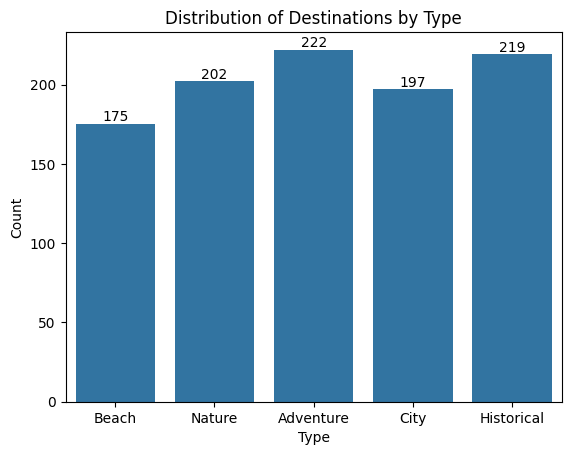

In [ ]:
ax = sns.countplot(x='Type',data=finalDf)
plt.title('Distribution of Destinations by Type')
plt.xlabel('Type')
plt.ylabel('Count')
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

# User Preferences

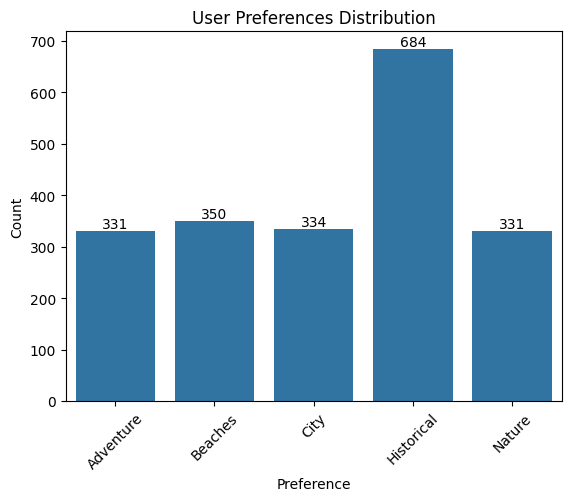

In [ ]:
#One-hot encoding using get_dummies() method
user_preferences_expanded = finalDf['Preferences'].str.get_dummies(sep=', ')

# Plotting the distribution of preferences
ax = sns.barplot(x=user_preferences_expanded.columns, y=user_preferences_expanded.sum().values)
plt.title('User Preferences Distribution')
plt.xlabel('Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
for bar in ax.containers:
  ax.bar_label(bar)
plt.show()

In [ ]:
user_preferences_expanded.head()

,Adventure,Beaches,City,Historical,Nature
0,0,0,1,1,0
1,0,0,1,1,0
2,0,1,0,1,0
3,1,0,0,0,1
4,1,0,0,0,1


People prefer visiting historical locations and beaches comapred to other locations.

# Ratings Distribution

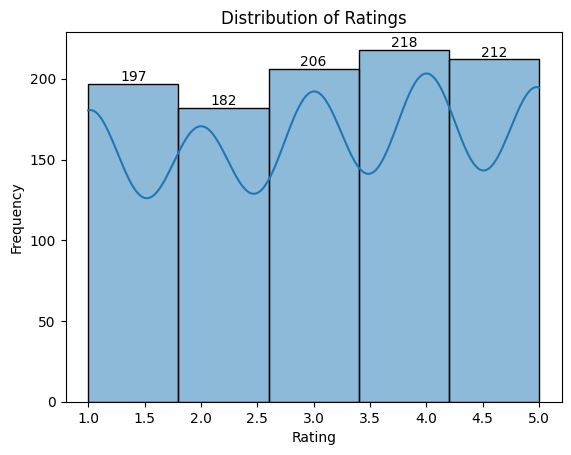

In [ ]:
ax = sns.histplot(finalDf['Rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
for bar in ax.containers:
  ax.bar_label(bar)
plt.show()

There are more destinations with higher popularity.

# Experience Rating Overtime

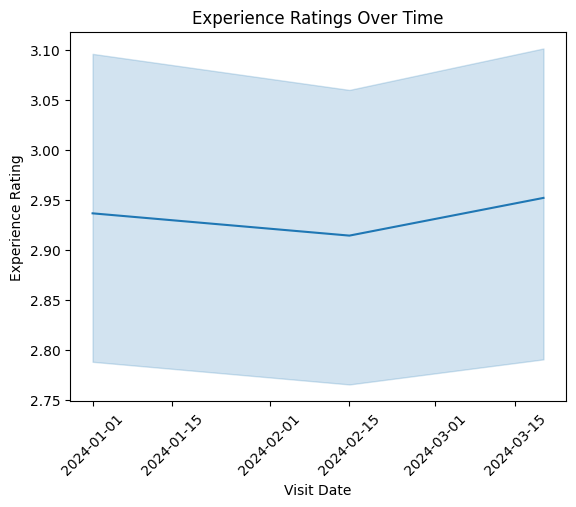

In [ ]:
ax = sns.lineplot(data=finalDf, x='VisitDate', y='ExperienceRating')
plt.title('Experience Ratings Over Time')
plt.xlabel('Visit Date')
plt.ylabel('Experience Rating')
plt.xticks(rotation=45)
plt.show()

# Building LLM
Here transformers library offered by Hugging Face will be used as it provides a variety of pre-trained models.

In [ ]:
!pip install transformers

## Model Selection and Initialization

I have chosen GPT-2 and initialized the tokenizer and model. The model is then fine-tuned on our custom dataset to generate travel recommendations.


In [ ]:
# Prepare the text data for training
text_data = ""
for index, row in finalDf.iterrows():
    text_data += f"Destination: {row['State']}\n"
    text_data += f"Type: {row['Type']}\n"
    text_data += f"Popularity: {row['Popularity']}\n"
    text_data += f"Rating: {row['Rating']}/5\n"
    text_data += f"Description: {row.get('ReviewText', 'No Review available')}\n\n"

# Save the text data to a file
with open('/content/drive/MyDrive/LLM Travel Recommender/training_data.txt', 'w') as f:
    f.write(text_data)

## Fine-Tuning the Model

The fine-tuning process involves training the model on a custom dataset for a few epochs. The model learns to generate coherent and contextually relevant travel recommendations based on the input data.


In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, TextDataset, DataCollatorForLanguageModeling

# Load the GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Load the dataset
def load_dataset(file_path, block_size=128):
    return TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=block_size
    )

train_dataset = load_dataset('/content/drive/MyDrive/LLM Travel Recommender/training_data.txt')

# Data collator for language modeling
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

# Training arguments
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/LLM Travel Recommender/gpt2-finetuned-travel-recommender",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=4,
    save_steps=10_000,
    save_total_limit=2
)

# Initializing the Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset
)

# Start fine-tuning
trainer.train()

# Saving the final model and tokenizer
trainer.save_model("/content/drive/MyDrive/LLM Travel Recommender/gpt2-finetuned-travel-recommender")
tokenizer.save_pretrained("/content/drive/MyDrive/LLM Travel Recommender/gpt2-finetuned-travel-recommender")


## Generating Recommendations

After fine-tuning, the model is used to generate travel recommendations based on user input. The model outputs a list of destinations, along with relevant details such as destination, type, popularity, rating and Reviews(Description).


In [ ]:
from transformers import pipeline

# Load the fine-tuned model
recommender_model = pipeline('text-generation', model='/content/drive/MyDrive/LLM Travel Recommender/gpt2-finetuned-travel-recommender')

# Test the model with a custom prompt
# prompt = "I love visiting beaches! Can you recommend some destinations?"
prompt = input("Provide a Prompt describing the place you want to travel : ")

# Generate text based on the prompt
recommendations = recommender_model(prompt, max_length=50, num_return_sequences=1)
# recommendations = recommender_model(prompt, max_new_tokens=50, num_return_sequences=1)


# Display the recommendations
print(recommendations[0]['generated_text'])


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I love visiting beaches! Can you recommend some destinations?

Destination: Goa
Type: Beach
Popularity: 8.31992877333898
Rating: 1/5
Description: A historical wonder

Dest


In [ ]:
# A function to clean the incomplete entries :

def cleanIncomEntries(generated_text):
    lines = generated_text.split("\n")
    cleaned_lines = []

    for line in lines:

      if line.startswith("Dest") and len(line) < 12:
        continue

      cleaned_lines.append(line)

    return "\n".join(cleaned_lines)


cleaned_text = cleanIncomEntries(recommendations[0]['generated_text'])
print(cleaned_text)


I love visiting beaches! Can you recommend some destinations?

Destination: Goa
Type: Beach
Popularity: 8.31992877333898
Rating: 1/5
Description: A historical wonder



## Conclusion

This project showcases the power of pre-trained language models in generating personalized travel recommendations. The model can be further fine-tuned and optimized for better accuracy and relevance.
